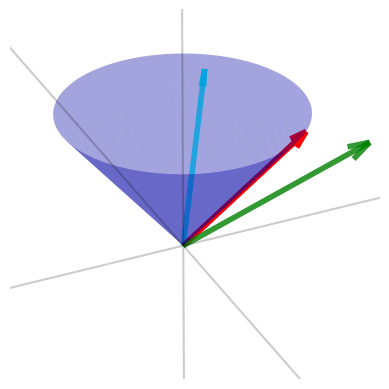

In [221]:
import matplotlib as plt

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def f(x, y):
    return np.sqrt(x ** 2 + y ** 2)

fig = plt.figure()
ax = plt.axes(projection='3d')
# Can manipulate with 100j and 80j values to make your cone looks different
u, v = np.meshgrid( np.linspace(0, 2*np.pi, 100), np.linspace(0, np.pi, 80) )

# [0:2*np.pi:100j, 0:np.pi:80j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = f(x, y)

ax.plot_surface(x, y, z, color="blue", alpha=0.2)

ax.quiver(0,0,-10,0,0,20, color="black", arrow_length_ratio=0.1, alpha=0.2)
ax.quiver(0,-10,0,0,20,0, color="black", arrow_length_ratio=0.1, alpha=0.2)
ax.quiver(-10,0,0,20,0,0, color="black", arrow_length_ratio=0.1, alpha=0.2)

ax.set_xlim(-0.8, 1)
ax.set_ylim(-0.8, 1)
ax.set_zlim(-0.1, 1)
ax.axis("off")

v1 = 0.5 * vector( (-sin(pi/4), cos(pi/4),0) )
v1[2] = 1.1

v2 = vector( (sin(pi/4), cos(pi/4),0) )
v2[2] = f( v2[0], v2[1] )

v3 = 1.5*vector( (sin(pi/4), cos(pi/4), 0) )
v3[2] = 1

ax.quiver(0,0,0, v1[0], v1[1], v1[2], color="cyan", arrow_length_ratio=0.1, alpha=0.8, lw=4)
ax.quiver(0,0,0, v2[0], v2[1], v2[2], color="red", arrow_length_ratio=0.1, alpha=1, lw=4)
ax.quiver(0,0,0, v3[0], v3[1], v3[2], color="green", arrow_length_ratio=0.1, alpha=0.8,lw=4)

ax.view_init(elev=30, azim=-25, roll=0)


#plt.savefig("light_cone.png")

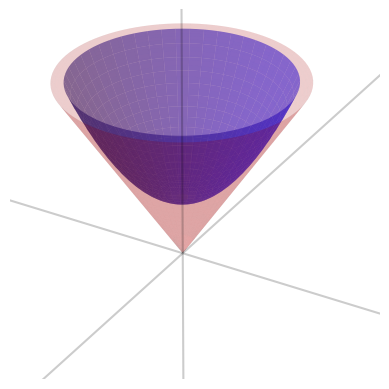

In [360]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.quiver(0,0,-10,0,0,20, color="black", arrow_length_ratio=0.1, alpha=0.2)
ax.quiver(0,-10,0,0,20,0, color="black", arrow_length_ratio=0.1, alpha=0.2)
ax.quiver(-10,0,0,20,0,0, color="black", arrow_length_ratio=0.1, alpha=0.2)


# Create the surface
radius = 0.5

# Generate the grid in cylindrical coordinates
r  = np.linspace(0, radius, 20)
theta = np.linspace(0, 2 * np.pi, 100)
R, THETA = np.meshgrid(r, theta)

X, Y = R * np.cos(THETA), R * np.sin(THETA)
a=0.5
b=a
c=a
def g(X, Y):
    return (X/a)**2 + (Y/b)**2
    
Z1 = g(X, Y) + 0.5



cutoff = 100
X2 = np.where(X**2+Y**2 >= cutoff ,np.NAN,X)
Y2 = np.where(X**2+Y**2 >= cutoff ,np.NAN,Y)


scale_factor = 1.8
ax.plot_surface(scale_factor*X2, scale_factor*Y2, Z1, color="blue", alpha=0.5)
ax.plot_surface(x, y, 1.5z, color="red", alpha=0.1)

ax.set_xlim(-0.8, 1)
ax.set_ylim(-0.8, 1)
ax.set_zlim(-0.1, 1.2)
ax.axis("off")

plt.savefig("paraboloid_in_cone.png")

plt.show()

In [361]:
plt.savefig("paraboloid_in_cone.png")

<Figure size 640x480 with 0 Axes>

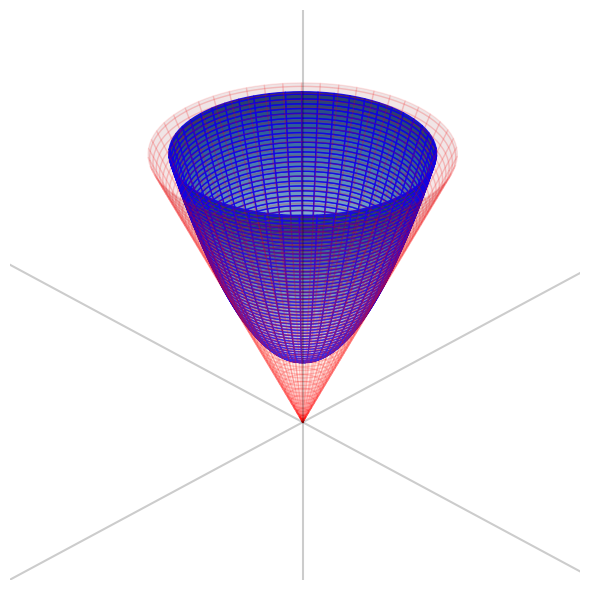

In [380]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
h = 0.25  # vertical shift of the paraboloid
z_max = 1

# Cone
theta = np.linspace(0, 2 * np.pi, 100)
z_cone = np.linspace(0, z_max, 100)
R_cone, T_cone = np.meshgrid(z_cone, theta)
X_cone = R_cone * np.cos(T_cone)
Y_cone = R_cone * np.sin(T_cone)
Z_cone = R_cone

# Paraboloid: x^2 + y^2 = z - h  => r = sqrt(z - h)
z_para = np.linspace(h, z_max, 100)
R_para, T_para = np.meshgrid(np.sqrt(z_para - h), theta)
X_para = R_para * np.cos(T_para)
Y_para = R_para * np.sin(T_para)
Z_para = z_para[np.newaxis, :]

# Expand Z_para to match shape
Z_para = np.tile(Z_para, (theta.size, 1))

# Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0,0,-10,0,0,20, color="black", arrow_length_ratio=0.1, alpha=0.2)
ax.quiver(0,-10,0,0,20,0, color="black", arrow_length_ratio=0.1, alpha=0.2)
ax.quiver(-10,0,0,20,0,0, color="black", arrow_length_ratio=0.1, alpha=0.2)

# Plot surfaces
ax.plot_surface(X_cone, Y_cone, Z_cone, alpha=0.1, cmap='Reds', edgecolor='red')
ax.plot_surface(X_para, Y_para, Z_para, alpha=0.9, cmap='Blues', edgecolor='blue')

# Labels and view

ax.view_init(elev=30, azim=45)
ax.set_box_aspect([1, 1, 1.5])
plt.tight_layout()
ax.set_xlim(-0.8, 1)
ax.set_ylim(-0.8, 1)
ax.set_zlim(-0.1, 1.2)
plt.axis("off")

plt.savefig("paraboloid_in_cone.png")


plt.show()


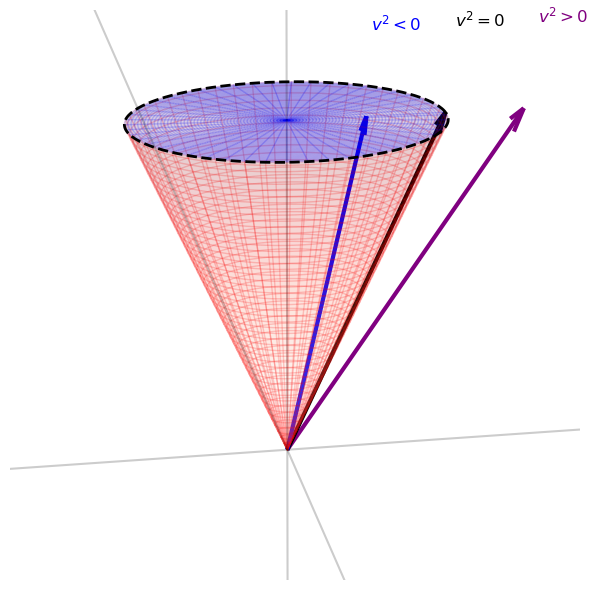

In [448]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Cone limited to 0 <= z <= 1
theta = np.linspace(0, 2 * np.pi, 100)
z = np.linspace(0, 1, 100)  # Now limited to z <= 1
R, T = np.meshgrid(z, theta)
X = R * np.cos(T)
Y = R * np.sin(T)
Z = R

# Vectors
vectors = [
    {"vec": (0.5, 0, 1), "label": r"$v^2 < 0$", "color": "blue"},     # Timelike
    {"vec": (1.0, 0, 1), "label": r"$v^2 = 0$", "color": "black"},    # Lightlike
    {"vec": (1.5, 0, 1), "label": r"$v^2 > 0$", "color": "purple"},   # Spacelike
]

# Start plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the truncated cone
ax.plot_surface(X, Y, Z, alpha=0.1, cmap='Reds', edgecolor='red')

# Draw base circle at z=1
circle_theta = np.linspace(0, 2 * np.pi, 200)
circle_x = np.cos(circle_theta)
circle_y = np.sin(circle_theta)
circle_z = np.ones_like(circle_x)
ax.plot(circle_x, circle_y, circle_z, color='black', linewidth=2, linestyle='--',zorder=10)


# Add vectors
for v in vectors:
    x, y, z = v["vec"]
    ax.quiver(0, 0, 0, x, y, z,
              color=v["color"],
              linewidth=3,
              arrow_length_ratio=0.05, zorder=10)
    ax.text(x * 1.05, y * 1.05, z + 0.25, v["label"], color=v["color"], fontsize=12)

ax.quiver(0,0,-10,0,0,20, color="black", arrow_length_ratio=0.1, alpha=0.2)
ax.quiver(0,-10,0,0,200,0, color="black", arrow_length_ratio=0.1, alpha=0.2)
ax.quiver(-10,0,0,200,0,0, color="black", arrow_length_ratio=0.1, alpha=0.2)

theta = np.linspace(0, 2 * np.pi, 100)
r = np.linspace(0, 1, 50)
R, T = np.meshgrid(r, theta)

# Convert to Cartesian coordinates
X = R * np.cos(T)
Y = R * np.sin(T)
Z = np.ones_like(X)  # Flat disc at z = 1

# Plot the disc
ax.plot_surface(X, Y, Z, color='blue', alpha=0.1, edgecolor='blue')



# Axes setup
ax.set_xlim(-1, 1.2)
ax.set_ylim(-1, 1)
ax.set_zlim(0, 1)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.axis("off")
# Improved viewing angle
ax.view_init(elev=20, azim=-100)
ax.set_box_aspect([1.3, 1, 1.3])
plt.tight_layout()


plt.savefig("light_cone.png")


plt.show()


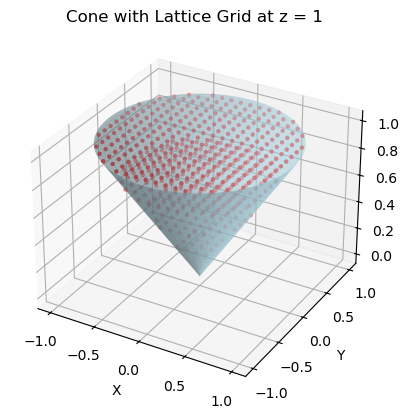

In [462]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create the cone geometry
def cone_surface(z_range):
    # Generate theta values for circular slices
    theta = np.linspace(0, 2 * np.pi, 100)
    Z = np.linspace(0, 1, 100)  # z values from 0 to 1
    Z, Theta = np.meshgrid(Z, theta)
    R = Z  # Radius is equal to the height for the cone
    X = R * np.cos(Theta)
    Y = R * np.sin(Theta)
    return X, Y, Z

# Create the lattice grid inside the unit disc at z=1
def lattice_points(cutoff = 1):
    # Create a grid of points in the square [-1, 1] x [-1, 1]
    x = np.linspace(-1, 1, 20)
    y = np.linspace(-1, 1, 20)
    X, Y = np.meshgrid(x, y)
    
    # Filter points that are inside the unit circle (x^2 + y^2 <= 1)
    mask = X**2 + Y**2 <= cutoff**2
    X = X[mask]
    Y = Y[mask]
    Z = cutoff * np.ones_like(X)  # All lattice points are at z = 1
    return X, Y, Z

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate and plot the cone surface
X_cone, Y_cone, Z_cone = cone_surface(np.linspace(0, 1, 100))
ax.plot_surface(X_cone, Y_cone, Z_cone, color='lightblue', edgecolor='none', alpha=0.6)

# Generate and plot the lattice points
X_lattice, Y_lattice, Z_lattice = lattice_points(1)
ax.scatter(X_lattice, Y_lattice, Z_lattice, color='red', s=5)

X_lattice, Y_lattice, Z_lattice = lattice_points(1/2)
ax.scatter(X_lattice, Y_lattice, Z_lattice, color='red', s=5,alpha=0.3)

X_lattice, Y_lattice, Z_lattice = lattice_points(1/4)
ax.scatter(X_lattice, Y_lattice, Z_lattice, color='red', s=5,alpha=0.2)

X_lattice, Y_lattice, Z_lattice = lattice_points(3/4)
ax.scatter(X_lattice, Y_lattice, Z_lattice, color='red', s=5,alpha=0.4)

# Set plot labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Cone with Lattice Grid at z = 1')

# Show the plot
plt.show()


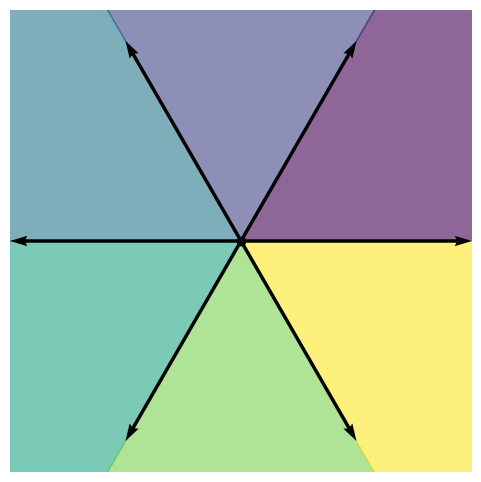

In [471]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Define the root vectors for A2
roots = [
    np.array([1, 0]),
    np.array([1/2, np.sqrt(3)/2]),
    np.array([-1, 0]),
    np.array([-1/2, np.sqrt(3)/2]),
    np.array([1/2, -np.sqrt(3)/2]),
    np.array([-1/2, -np.sqrt(3)/2])
]

# Define the angles corresponding to the sectors
angles = np.linspace(0, 2*np.pi, 7)  # 7 points to close the loop for the polygon

# Create a function to generate the sector polygons
def create_sector_polygon(center, angle_start, angle_end, radius=2):
    # Create points for a sector polygon
    points = [center]
    for angle in np.linspace(angle_start, angle_end, 10):  # More points for smooth polygon
        points.append(center + radius * np.array([np.cos(angle), np.sin(angle)]))
    points.append(center + radius * np.array([np.cos(angle_end), np.sin(angle_end)]))  # Close the polygon
    return np.array(points)

# Plotting the root system and sectors
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

# Get a set of colors from a sequential colormap (viridis)
colors = plt.cm.viridis(np.linspace(0, 1, 6))  # Using the "viridis" colormap

# Fill sectors with different colors from the colormap
for i in range(6):
    # Each sector spans an angle of pi/3
    sector_polygon = create_sector_polygon(
        center=np.array([0, 0]), 
        angle_start=angles[i], 
        angle_end=angles[i+1], 
        radius=1.5  # The radius of the sector is set to 1.5 to fill beyond the box
    )
    ax.add_patch(Polygon(sector_polygon, closed=True, color=colors[i], alpha=0.6))

# Plotting the roots
for root in roots:
    ax.quiver(0, 0, root[0], root[1], angles='xy', scale_units='xy', scale=1, color='black')

# Plotting the origin
ax.plot(0, 0, 'ko')  # Mark the origin

# Set the grid and labels
ax.grid(True)

ax.axis("off")

plt.savefig("A2_tiling.png")


plt.show()


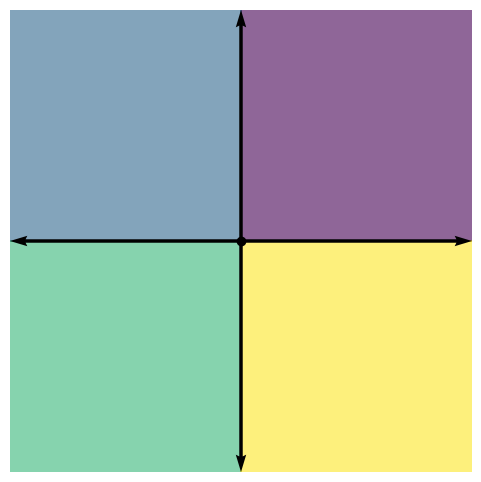

In [474]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Define the root vectors for A1xA1
roots = [
    np.array([1, 0]),
    np.array([0, 1]),
    np.array([-1, 0]),
    np.array([0, -1])
]

# Define the angles corresponding to the quadrants
angles = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])  # 5 points to close the quadrants

# Create a function to generate the quadrant polygons
def create_quadrant_polygon(center, angle_start, angle_end, radius=2):
    # Create points for a quadrant polygon
    points = [center]
    for angle in np.linspace(angle_start, angle_end, 10):  # More points for smooth polygon
        points.append(center + radius * np.array([np.cos(angle), np.sin(angle)]))
    points.append(center + radius * np.array([np.cos(angle_end), np.sin(angle_end)]))  # Close the polygon
    return np.array(points)

# Plotting the root system and sectors (quadrants)
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

# Get a set of colors from the sequential colormap (viridis)
colors = plt.cm.viridis(np.linspace(0, 1, 4))  # Using the "viridis" colormap for 4 quadrants

# Fill quadrants with different colors from the colormap
for i in range(4):
    # Each quadrant spans an angle of pi/2
    quadrant_polygon = create_quadrant_polygon(
        center=np.array([0, 0]), 
        angle_start=angles[i], 
        angle_end=angles[i+1], 
        radius=1.5  # The radius of the quadrant is set to 1.5 to fill beyond the box
    )
    ax.add_patch(Polygon(quadrant_polygon, closed=True, color=colors[i], alpha=0.6))

# Plotting the roots
for root in roots:
    ax.quiver(0, 0, root[0], root[1], angles='xy', scale_units='xy', scale=1, color='black')

# Plotting the origin
ax.plot(0, 0, 'ko')  # Mark the origin

# Set the grid and labels
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis("off")

plt.savefig("A1xA1_tiling.png")


plt.show()


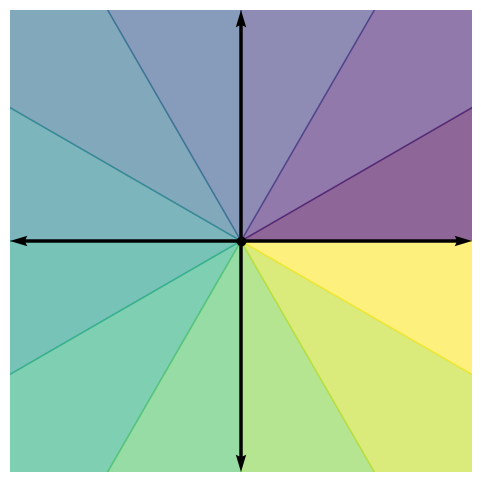

In [521]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Define the root vectors for A1xA1
roots = [
    np.array([1, 0]),
    np.array([0, 1]),
    np.array([-1, 0]),
    np.array([0, -1])
]

# Define the angles corresponding to the sectors (12 sectors of pi/6)
angles = np.linspace(0, 2*np.pi, 13)  # 13 points to close the loop for the 12 sectors

# Create a function to generate the sector polygons
def create_sector_polygon(center, angle_start, angle_end, radius=2):
    # Create points for a sector polygon
    points = [center]
    for angle in np.linspace(angle_start, angle_end, 10):  # More points for smooth polygon
        points.append(center + radius * np.array([np.cos(angle), np.sin(angle)]))
    points.append(center + radius * np.array([np.cos(angle_end), np.sin(angle_end)]))  # Close the polygon
    return np.array(points)

# Plotting the root system and sectors (now 12 sectors)
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

# Get a set of colors from the sequential colormap (viridis)
colors = plt.cm.viridis(np.linspace(0, 1, 12))  # Using the "viridis" colormap for 12 sectors

# Fill sectors with different colors from the colormap
for i in range(12):
    # Each sector spans an angle of pi/6
    sector_polygon = create_sector_polygon(
        center=np.array([0, 0]), 
        angle_start=angles[i], 
        angle_end=angles[i+1], 
        radius=1.5  # The radius of the sector is set to 1.5 to fill beyond the box
    )
    ax.add_patch(Polygon(sector_polygon, closed=True, color=colors[i], alpha=0.6))

ax.set_aspect('equal')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
# Plotting the roots
for root in roots:
    ax.quiver(0, 0, root[0], root[1], angles='xy', scale_units='xy', scale=1, color='black')

# Plotting the origin
ax.plot(0, 0, 'ko')  # Mark the origin

# Set the grid and labels
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.axis("off")

plt.savefig("pi_m_tiling.png")


plt.show()


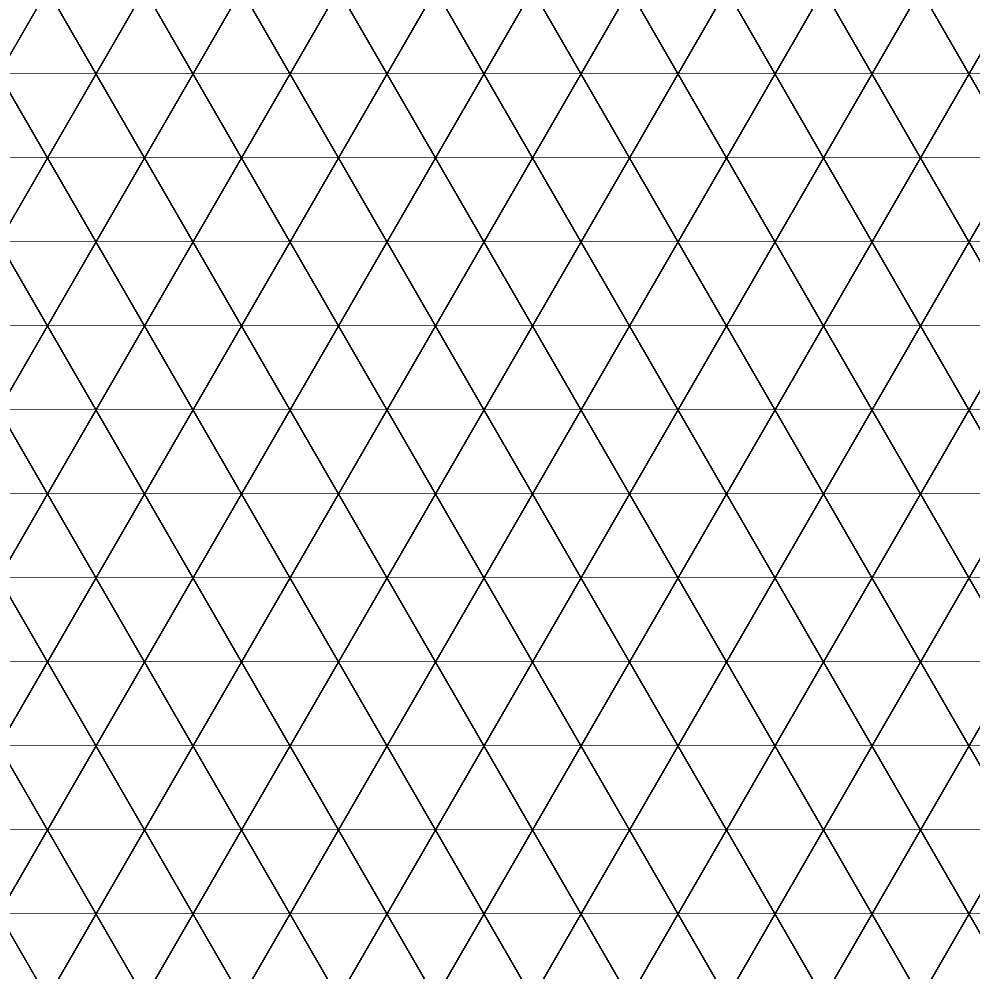

In [485]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import math


def create_triangular_grid(xmin, xmax, ymin, ymax, spacing=1.0):
    """
    Create a triangular grid with equilateral triangles (60° internal angles)
    within the specified bounds.
    
    Parameters:
    -----------
    xmin, xmax, ymin, ymax : float
        Boundaries of the grid
    spacing : float
        Distance between adjacent grid points
    
    Returns:
    --------
    segments : list
        List of line segments that form the triangular grid
    """
    # Constants for hexagonal grid
    dx = spacing
    dy = spacing * math.sqrt(3) / 2  # Height of equilateral triangle
    
    # Calculate grid dimensions
    x_margin = dx
    y_margin = dy
    x_range = np.arange(xmin - x_margin, xmax + x_margin, dx)
    y_range = np.arange(ymin - y_margin, ymax + y_margin, dy)
    
    # Generate the grid segments
    segments = []
    
    # Horizontal lines
    for i, y in enumerate(y_range):
        x_start = xmin - x_margin
        x_end = xmax + x_margin
        segments.append([(x_start, y-yshift), (x_end, y-yshift)])
    
    # Diagonal lines (/)
    for i, x in enumerate(x_range):
        for j in range(-int((xmax-xmin)/dx) - 2, int((xmax-xmin)/dx) + 2):
            x_start = x + j * dx
            y_start = ymin - y_margin
            x_end = x_start + (ymax - ymin + 2*y_margin) / math.sqrt(3)
            y_end = ymax + y_margin
            
            # Check if the line segment intersects with our boundary
            if (x_end >= xmin - x_margin and x_start <= xmax + x_margin):
                segments.append([(x_start, y_start), (x_end, y_end)])
    
    # Diagonal lines (\)
    for i, x in enumerate(x_range):
        for j in range(-int((xmax-xmin)/dx) - 2, int((xmax-xmin)/dx) + 2):
            x_start = x + j * dx
            y_start = ymax + y_margin
            x_end = x_start + (ymax - ymin + 2*y_margin) / math.sqrt(3)
            y_end = ymin - y_margin
            
            # Check if the line segment intersects with our boundary
            if (x_end >= xmin - x_margin and x_start <= xmax + x_margin):
                segments.append([(x_start, y_start), (x_end, y_end)])
    
    return segments

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Create the triangular grid
xmin, xmax = -5, 5
ymin, ymax = -5, 5
spacing = 1.0  # Distance between grid points

yshift = 1.05


segments = create_triangular_grid(xmin, xmax, ymin, ymax, spacing)

# Add the grid lines to the plot
line_segments = LineCollection(segments, colors='black', linewidths=0.5)
ax.add_collection(line_segments)

# Set the plot limits
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Remove axes and make it look clean
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()


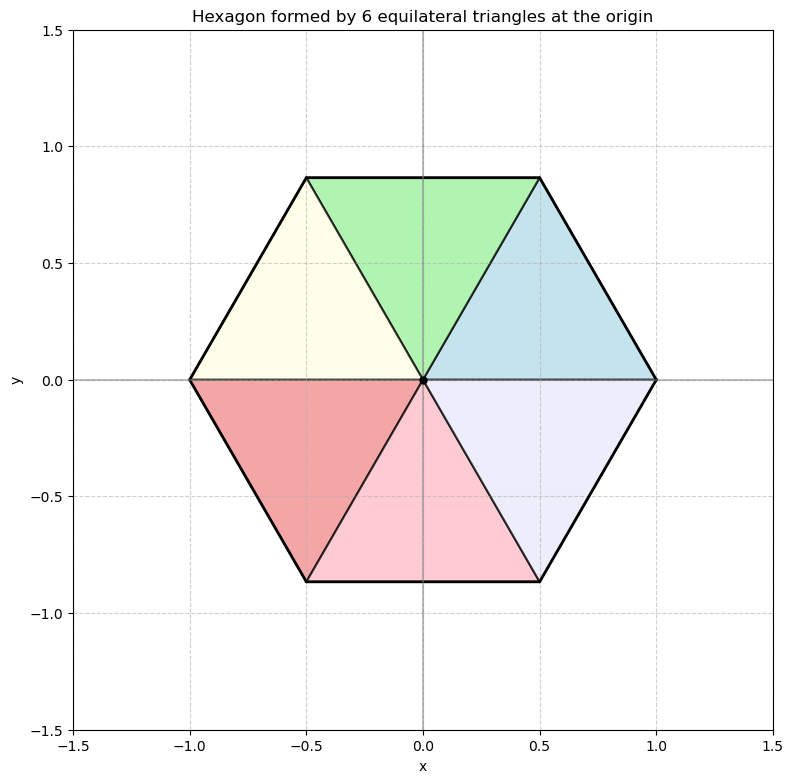

In [486]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import math

def create_hexagon_with_triangles():
    """
    Create a hexagon at the origin formed by 6 equilateral triangles with π/3 (60°) angles.
    Returns the coordinates of the triangles and hexagon vertices.
    """
    # Create a hexagon centered at the origin
    # For a hexagon with "radius" 1 (distance from center to vertex)
    hexagon_radius = 1.0
    
    # Calculate the hexagon vertices (counterclockwise from the rightmost point)
    hexagon_vertices = []
    for i in range(6):
        angle = i * math.pi / 3  # 60° increments
        x = hexagon_radius * math.cos(angle)
        y = hexagon_radius * math.sin(angle)
        hexagon_vertices.append((x, y))
    
    # Create triangles connecting the origin to consecutive hexagon vertices
    triangles = []
    origin = (0, 0)
    
    for i in range(6):
        v1 = hexagon_vertices[i]
        v2 = hexagon_vertices[(i + 1) % 6]  # Wrap around for the last triangle
        triangles.append([origin, v1, v2])
    
    return triangles, hexagon_vertices

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Create the hexagon with triangles
triangles, hexagon_vertices = create_hexagon_with_triangles()

# Plot the triangles with different colors
colors = ['lightblue', 'lightgreen', 'lightyellow', 'lightcoral', 'lightpink', 'lavender']
for i, triangle in enumerate(triangles):
    triangle_patch = Polygon(triangle, closed=True, 
                             facecolor=colors[i % len(colors)], 
                             edgecolor='black', 
                             alpha=0.7, 
                             linewidth=1.5)
    ax.add_patch(triangle_patch)

# Draw the hexagon outline explicitly
hexagon_vertices_closed = hexagon_vertices + [hexagon_vertices[0]]  # Close the loop
xs, ys = zip(*hexagon_vertices_closed)
ax.plot(xs, ys, 'k-', linewidth=2)

# Draw the Cartesian grid
grid_extent = 1.5  # Extend grid beyond the hexagon
ax.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
ax.axvline(x=0, color='gray', linestyle='-', alpha=0.5)

# Calculate tick marks
tick_spacing = 0.5
ticks = np.arange(-grid_extent, grid_extent + tick_spacing, tick_spacing)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.grid(True, linestyle='--', alpha=0.6)

# Mark the origin
ax.plot(0, 0, 'ko', markersize=5)

# Set aspect ratio and limits
ax.set_aspect('equal')
ax.set_xlim(-grid_extent, grid_extent)
ax.set_ylim(-grid_extent, grid_extent)

# Add labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Hexagon formed by 6 equilateral triangles at the origin')

plt.tight_layout()
plt.show()

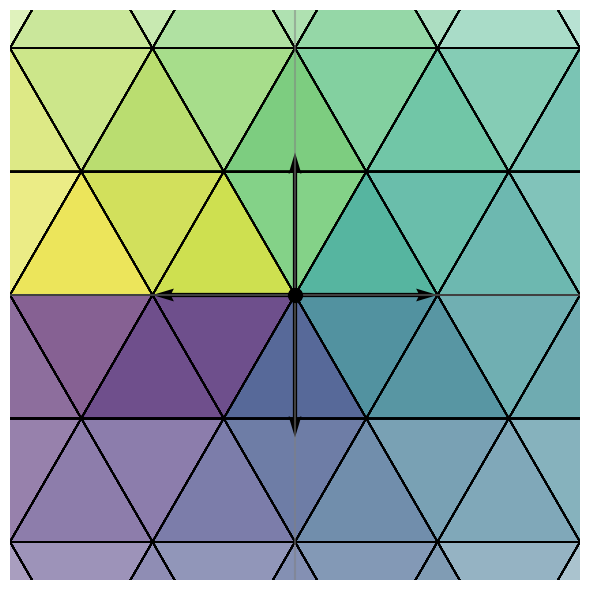

In [549]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.cm import viridis
import math

def reflect_point_over_line(point, line_p1, line_p2):
    """Reflect a point over a line defined by two points."""
    # Line vector
    dx = line_p2[0] - line_p1[0]
    dy = line_p2[1] - line_p1[1]
    
    # Normalize the line vector
    length = math.sqrt(dx*dx + dy*dy)
    dx /= length
    dy /= length
    
    # Vector from line_p1 to point
    vx = point[0] - line_p1[0]
    vy = point[1] - line_p1[1]
    
    # Project this vector onto the line
    dot_product = vx*dx + vy*dy
    proj_x = dot_product * dx
    proj_y = dot_product * dy
    
    # Calculate the reflection
    reflect_x = 2*line_p1[0] + 2*proj_x - point[0]
    reflect_y = 2*line_p1[1] + 2*proj_y - point[1]
    
    return (reflect_x, reflect_y)

def reflect_triangle(triangle, edge_index):
    """Reflect a triangle over one of its edges."""
    p1_idx = edge_index
    p2_idx = (edge_index + 1) % 3
    p3_idx = (edge_index + 2) % 3
    
    # The edge we're reflecting over
    edge_p1 = triangle[p1_idx]
    edge_p2 = triangle[p2_idx]
    
    # The point we need to reflect
    point = triangle[p3_idx]
    
    # Reflect the point
    reflected_point = reflect_point_over_line(point, edge_p1, edge_p2)
    
    # Create the new triangle with the reflected point
    new_triangle = [
        triangle[p1_idx],
        triangle[p2_idx],
        reflected_point
    ]
    
    return new_triangle

def generate_triangular_tiling(initial_triangles, box_size=5):
    """
    Generate a triangular tiling starting from initial triangles and
    reflecting them to fill a box of given size.
    """
    all_triangles = initial_triangles.copy()
    edges_with_neighbors = set()  # Keep track of edges that have neighbors
    triangles_to_process = initial_triangles.copy()
    
    # Convert triangles to a hashable format for tracking
    processed_triangles = set(tuple(map(tuple, triangle)) for triangle in all_triangles)
    
    max_iterations = 1000  # Safety limit
    iteration = 0
    
    while triangles_to_process and iteration < max_iterations:
        iteration += 1
        current_triangle = triangles_to_process.pop(0)
        
        # Check each edge of the triangle
        for i in range(3):
            edge = (tuple(current_triangle[i]), tuple(current_triangle[(i+1)%3]))
            edge_reversed = (edge[1], edge[0])
            
            # Skip if this edge already has a neighbor
            if edge in edges_with_neighbors or edge_reversed in edges_with_neighbors:
                continue
            
            # Reflect the triangle over this edge
            new_triangle = reflect_triangle(current_triangle, i)
            new_triangle_tuple = tuple(map(tuple, new_triangle))
            
            # Check if the new triangle is already in our set
            if new_triangle_tuple not in processed_triangles:
                # Check if the new triangle is inside our box
                if all(-box_size <= p[0] <= box_size and -box_size <= p[1] <= box_size for p in new_triangle):
                    all_triangles.append(new_triangle)
                    triangles_to_process.append(new_triangle)
                    processed_triangles.add(new_triangle_tuple)
                    
                    # Mark this edge as having a neighbor
                    edges_with_neighbors.add(edge)
                    edges_with_neighbors.add(edge_reversed)
    
    return all_triangles

def create_initial_hexagon_with_triangles():
    """Create a hexagon at the origin formed by 6 equilateral triangles."""
    # Create a hexagon centered at the origin
    hexagon_radius = 1.0
    
    # Calculate the hexagon vertices
    hexagon_vertices = []
    for i in range(6):
        angle = i * math.pi / 3
        x = hexagon_radius * math.cos(angle)
        y = hexagon_radius * math.sin(angle)
        hexagon_vertices.append((x, y))
    
    # Create triangles
    triangles = []
    origin = (0, 0)
    
    for i in range(6):
        v1 = hexagon_vertices[i]
        v2 = hexagon_vertices[(i + 1) % 6]
        triangles.append([origin, v1, v2])
    
    return triangles


# Set up the plot
fig, ax = plt.subplots(figsize=(6, 6))
# Create the initial triangles
initial_triangles = create_initial_hexagon_with_triangles()

# Generate the tiling
box_size = 5  # Size of the box (-5 to 5 in both directions)
all_triangles = generate_triangular_tiling(initial_triangles, box_size)

# Plot the triangles with viridis color scheme
num_triangles = len(all_triangles)
for i, triangle in enumerate(all_triangles):
    # Get a color from the viridis colormap based on the triangle's position
    # We'll use the distance from the origin to the centroid for coloring
    centroid = np.mean(triangle, axis=0)
    distance = np.sqrt(centroid[0]**2 + centroid[1]**2)
    # Normalize distance to be between 0 and 1 for the colormap
    max_distance = np.sqrt(2) * box_size
    normalized_distance = min(distance / max_distance, 0.99)  # Cap at 0.99 to avoid reaching the very end of the colormap
    
    # Get color from viridis
    color = viridis(normalized_distance)
    #color = viridis( abs(i-20) /20 )

    # Calculate the centroid of the triangle
    centroid = np.mean(triangle, axis=0)
    
    # Calculate distance from origin to centroid
    distance = np.sqrt(centroid[0]**2 + centroid[1]**2)
    
    # Calculate angle from origin to centroid (in radians)
    angle = np.arctan2(centroid[1], centroid[0])
    
    # Normalize angle to be between 0 and 1 for color selection
    # Map the full circle (2π) to the color range
    normalized_angle = (angle + np.pi) / (2 * np.pi)
    
    # Get base color from viridis based on angle
    base_color = viridis(normalized_angle)
    
    # Calculate alpha (transparency) based on distance
    # Decreases with increasing distance, but never becomes fully transparent
    max_distance = np.sqrt(2) * box_size
    alpha = 0.05*max(0.2, 1 - (distance / max_distance))
    
    # Create final color with adjusted alpha
    color = (base_color[0], base_color[1], base_color[2], alpha)


    
    triangle_patch = Polygon(triangle, closed=True, 
                            facecolor=color, 
                            edgecolor='black', 
                            linewidth=1)
    ax.add_patch(triangle_patch)

# Draw the Cartesian grid
ax.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
ax.axvline(x=0, color='gray', linestyle='-', alpha=0.5)
#ax.grid(True, linestyle='--', alpha=0.3)

# Mark the origin
ax.plot(0, 0, 'black', marker="o", markersize=10, markeredgecolor='black')

# Set aspect ratio and limits
ax.set_aspect('equal')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.axis("off")

for root in roots:
    ax.quiver(0, 0, root[0], root[1], angles='xy', scale_units='xy', scale=1, color='black')

plt.tight_layout()

plt.savefig("tilde_A2_tiling.png")

plt.show()


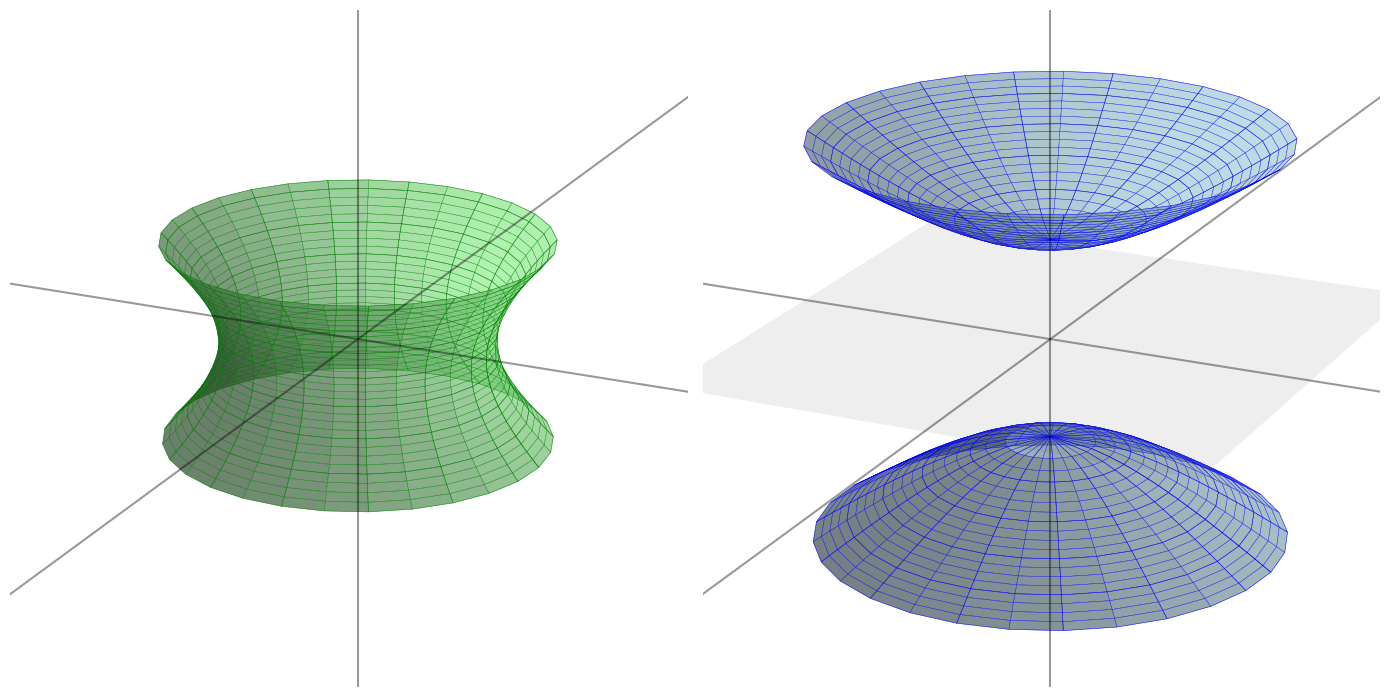

In [587]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Create a figure with two subplots
fig = plt.figure(figsize=(14, 14))

# First subplot: One-sheet hyperboloid (left, green)
ax1 = fig.add_subplot(121, projection='3d')

# Parameters for the one-sheet hyperboloid: x²/a² + y²/b² - z²/c² = 1
a1, b1, c1 = 1.0, 1.0, 1.0

# Create a meshgrid for parametric equation
u = np.linspace(-1, 1, 30)
v = np.linspace(0, 2*np.pi, 30)
U, V = np.meshgrid(u, v)

# Parametric equations for one-sheet hyperboloid
X1 = a1 * np.sqrt(1 + U**2) * np.cos(V)
Y1 = b1 * np.sqrt(1 + U**2) * np.sin(V)
Z1 = c1 * U

# Plot the surface with wireframe
ax1.plot_surface(X1, Y1, Z1, color='lightgreen', alpha=0.7, 
                 rstride=1, cstride=1, linewidth=0.3, edgecolor='green')

# Add wireframe grid
ax1.plot_wireframe(X1, Y1, Z1, color='green', alpha=0.5, linewidth=0.5, 
                   rstride=2, cstride=4)

# Second subplot: Two-sheet hyperboloid (right, blue)
ax2 = fig.add_subplot(122, projection='3d')

# Parameters for the two-sheet hyperboloid: -x²/a² - y²/b² + z²/c² = 1
a2, b2, c2 = 1.0, 1.0, 1.0

# Create separate meshgrids for upper and lower sheets
# Upper sheet (s >= 1)
s_upper = np.linspace(1, 2, 20)  # z parameter for upper sheet
t = np.linspace(0, 2*np.pi, 30)  # angle parameter
S_upper, T_upper = np.meshgrid(s_upper, t)

# Lower sheet (s <= -1)
s_lower = np.linspace(-2, -1, 20)  # z parameter for lower sheet
S_lower, T_lower = np.meshgrid(s_lower, t)

# Parametric equations for two-sheet hyperboloid
# Upper sheet
X2_upper = a2 * np.sqrt(S_upper**2 - 1) * np.cos(T_upper)
Y2_upper = b2 * np.sqrt(S_upper**2 - 1) * np.sin(T_upper)
Z2_upper = c2 * S_upper

# Lower sheet
X2_lower = a2 * np.sqrt(S_lower**2 - 1) * np.cos(T_lower)
Y2_lower = b2 * np.sqrt(S_lower**2 - 1) * np.sin(T_lower)
Z2_lower = c2 * S_lower

# Plot the upper sheet
surf_upper = ax2.plot_surface(X2_upper, Y2_upper, Z2_upper, 
                            color='lightblue', alpha=0.7,
                            rstride=1, cstride=1, linewidth=0.3, 
                            edgecolor='blue', zorder=10)

# Plot the lower sheet
surf_lower = ax2.plot_surface(X2_lower, Y2_lower, Z2_lower, 
                            color='lightblue', alpha=0.7,
                            rstride=1, cstride=1, linewidth=0.3, 
                            edgecolor='blue', zorder=10)

# Add wireframe grid for upper sheet
ax2.plot_wireframe(X2_upper, Y2_upper, Z2_upper, 
                 color='blue', alpha=0.5, linewidth=0.5,
                 rstride=2, cstride=4, zorder=10)

# Add wireframe grid for lower sheet
ax2.plot_wireframe(X2_lower, Y2_lower, Z2_lower, 
                 color='blue', alpha=0.5, linewidth=0.5,
                 rstride=2, cstride=4, zorder=10)

# Draw the horizontal coordinate plane at z=0 for the two-sheet hyperboloid
r = np.linspace(-2, 2, 10)
X_plane, Y_plane = np.meshgrid(r, r)
Z_plane = np.zeros_like(X_plane)
ax2.plot_surface(X_plane, Y_plane, Z_plane, color='gray', alpha=0.1)

# Add coordinate axes to both plots
for ax in [ax1, ax2]:
    # Show the coordinate axes
    
    ax.grid(True)
    ax.quiver(0,0,-10,0,0,20, color="black", arrow_length_ratio=0.1, alpha=0.4, zorder=0)
    ax.quiver(0,-10,0,0,200,0, color="black", arrow_length_ratio=0.1, alpha=0.4, zorder=0)
    ax.quiver(-5,0,0,10,0,0, color="black", arrow_length_ratio=0.1, alpha=0.4, zorder=0)
    #ax.axis(True)
    
    # Set limits and labels
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_zlim(-1.5, 1.5)
    
    # Remove axis labels and ticks
    ax.set_axis_off()
    #ax.set_xticks("none")
    
    # Set the view angle to match the reference image
    ax.view_init(elev=20, azim=-65)


plt.tight_layout()

plt.savefig("hyperboloid_sheets.png")

plt.show()

In [553]:
S

array([[-2.        , -1.86206897, -1.72413793, -1.5862069 , -1.44827586,
        -1.31034483, -1.17241379, -1.03448276, -0.89655172, -0.75862069,
        -0.62068966, -0.48275862, -0.34482759, -0.20689655, -0.06896552,
         0.06896552,  0.20689655,  0.34482759,  0.48275862,  0.62068966,
         0.75862069,  0.89655172,  1.03448276,  1.17241379,  1.31034483,
         1.44827586,  1.5862069 ,  1.72413793,  1.86206897,  2.        ],
       [-2.        , -1.86206897, -1.72413793, -1.5862069 , -1.44827586,
        -1.31034483, -1.17241379, -1.03448276, -0.89655172, -0.75862069,
        -0.62068966, -0.48275862, -0.34482759, -0.20689655, -0.06896552,
         0.06896552,  0.20689655,  0.34482759,  0.48275862,  0.62068966,
         0.75862069,  0.89655172,  1.03448276,  1.17241379,  1.31034483,
         1.44827586,  1.5862069 ,  1.72413793,  1.86206897,  2.        ],
       [-2.        , -1.86206897, -1.72413793, -1.5862069 , -1.44827586,
        -1.31034483, -1.17241379, -1.03448276, -0

In [555]:
S[mask_upper]

array([1.03448276, 1.17241379, 1.31034483, 1.44827586, 1.5862069 ,
       1.72413793, 1.86206897, 2.        , 1.03448276, 1.17241379,
       1.31034483, 1.44827586, 1.5862069 , 1.72413793, 1.86206897,
       2.        , 1.03448276, 1.17241379, 1.31034483, 1.44827586,
       1.5862069 , 1.72413793, 1.86206897, 2.        , 1.03448276,
       1.17241379, 1.31034483, 1.44827586, 1.5862069 , 1.72413793,
       1.86206897, 2.        , 1.03448276, 1.17241379, 1.31034483,
       1.44827586, 1.5862069 , 1.72413793, 1.86206897, 2.        ,
       1.03448276, 1.17241379, 1.31034483, 1.44827586, 1.5862069 ,
       1.72413793, 1.86206897, 2.        , 1.03448276, 1.17241379,
       1.31034483, 1.44827586, 1.5862069 , 1.72413793, 1.86206897,
       2.        , 1.03448276, 1.17241379, 1.31034483, 1.44827586,
       1.5862069 , 1.72413793, 1.86206897, 2.        , 1.03448276,
       1.17241379, 1.31034483, 1.44827586, 1.5862069 , 1.72413793,
       1.86206897, 2.        , 1.03448276, 1.17241379, 1.31034